Enter length (SI units): 0.5
Enter Young's Modulus (SI units): 70000000000
Enter initial cross-sectional area (SI units): 0.00124
Enter applied force (SI units): -5000
Reaction force at x=L is: 5000.0
Reaction force at x=L for 2 elements: 5000.0 N
Reaction force at x=L is: 5000.0
Reaction force at x=L for 8 elements: 5000.0 N
Reaction force at x=L is: 5000.0
Reaction force at x=L for 32 elements: 5000.0 N
Reaction force at x=L is: 5000.0
Reaction force at x=L for 128 elements: 5000.0 N


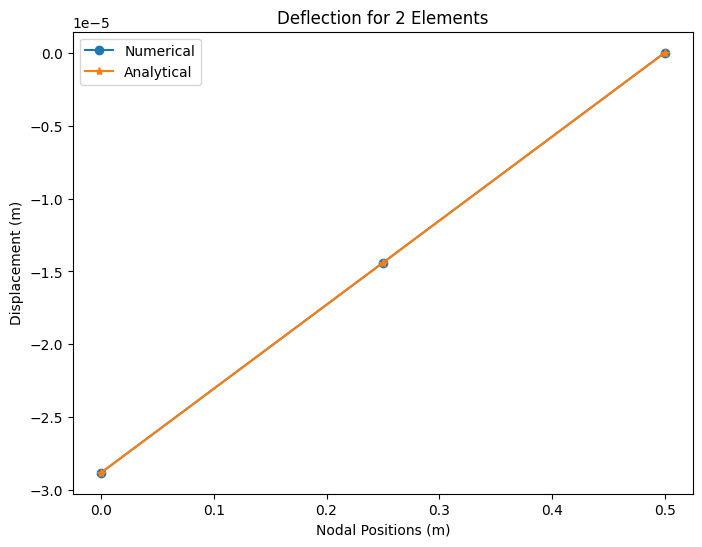

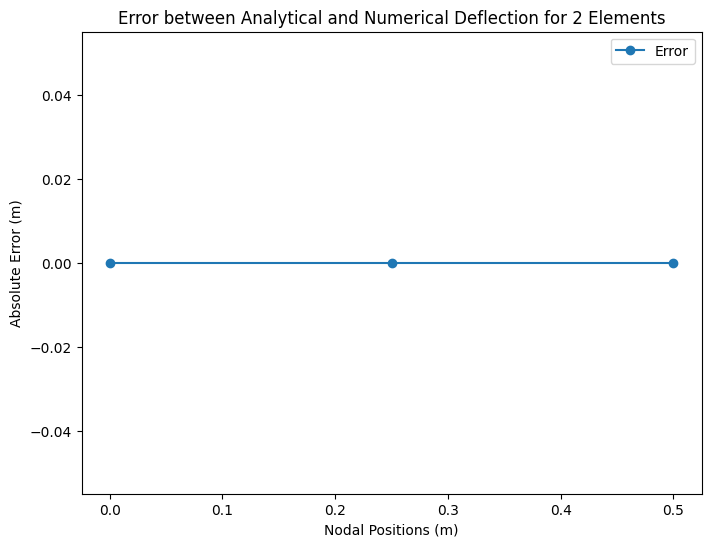

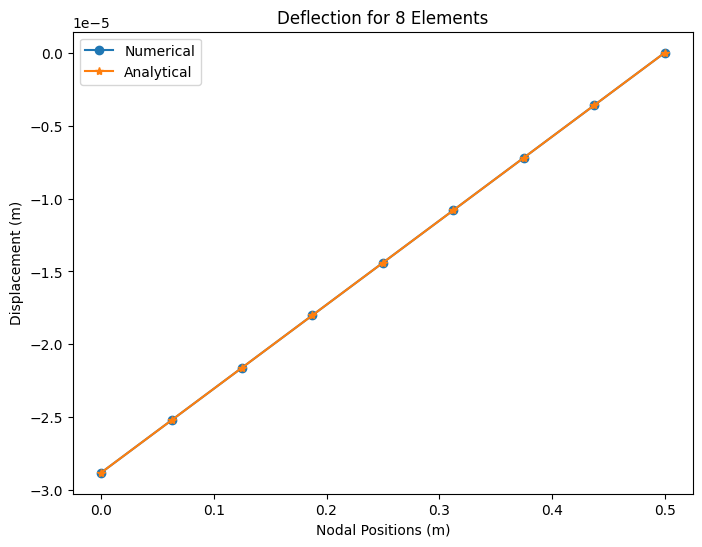

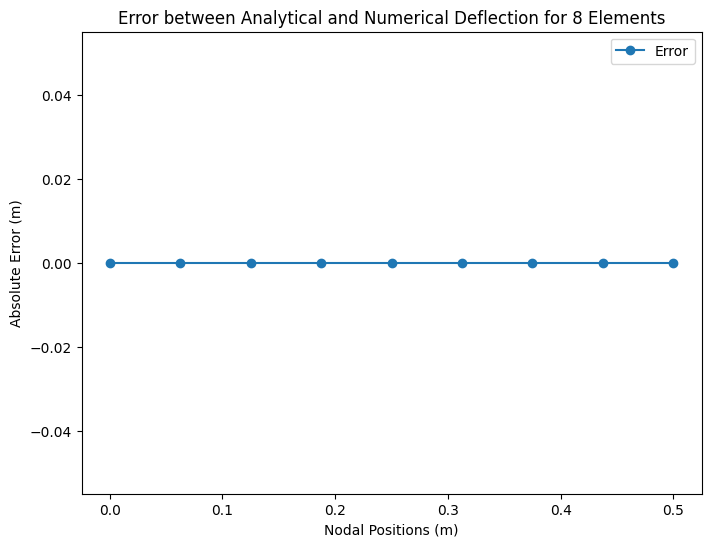

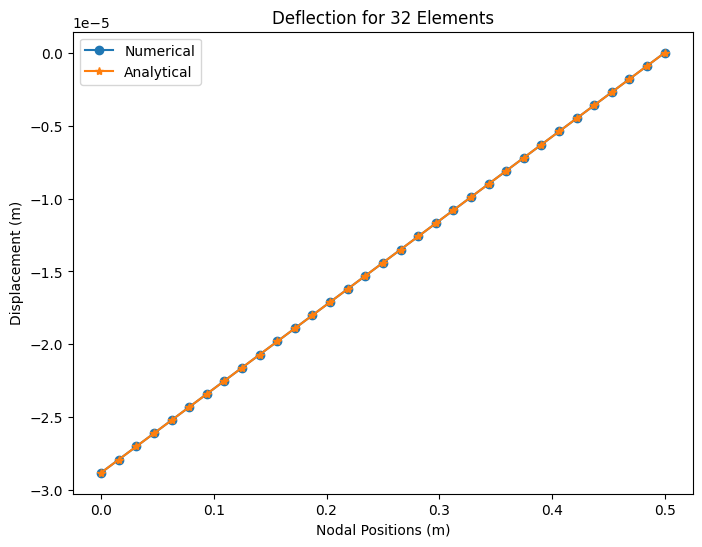

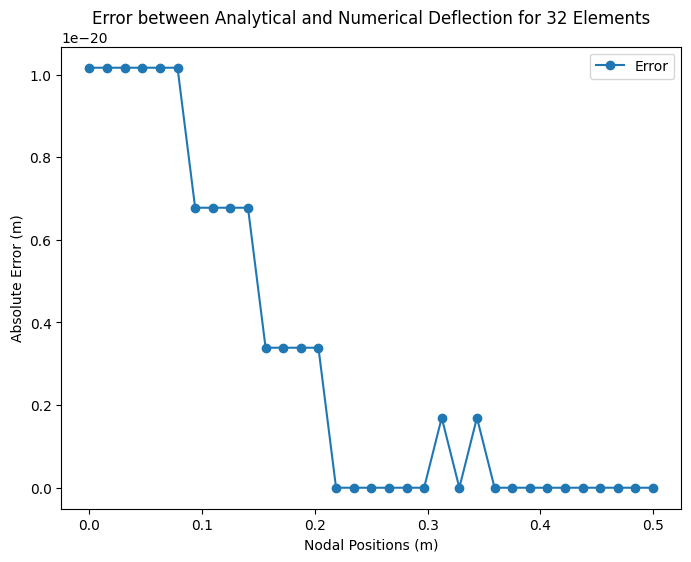

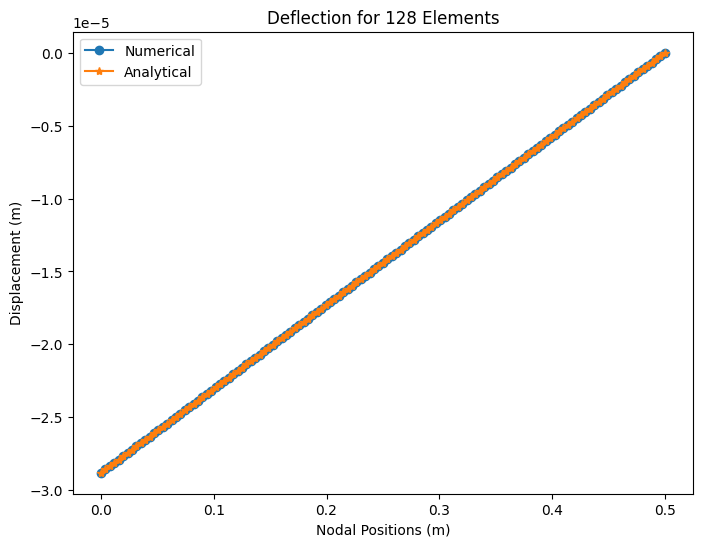

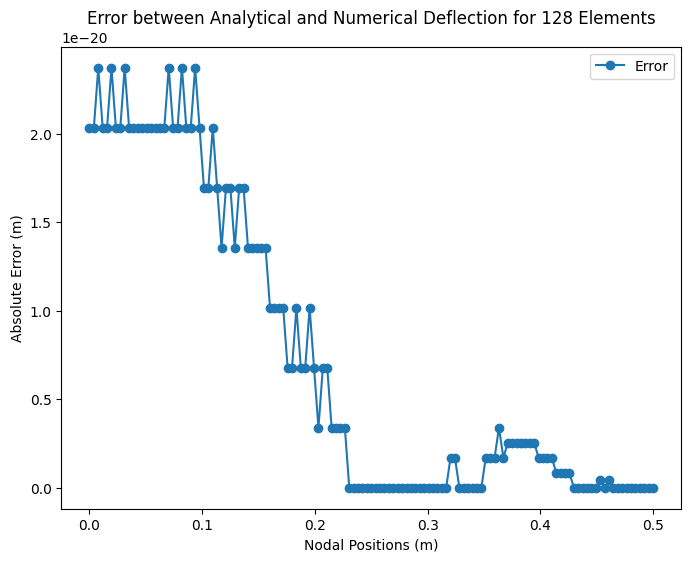

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_displacement(inputs_list):
    # Initialize variables
    elementalLength = inputs_list['length'] / inputs_list['elements']
    nodesPosi = np.linspace(0, inputs_list['length'], inputs_list['elements'] + 1).reshape(-1, 1)
    num_nodes = inputs_list['elements'] + 1

    # Initialize matrices
    kg = np.zeros((num_nodes, num_nodes))
    u = np.zeros((num_nodes, 1))
    F = np.zeros((num_nodes, 1))
    F[0] = inputs_list['force']

    # Define t matrix
    t = np.array([[1, -1], [-1, 1]])

    area = inputs_list['A0']
    K = (inputs_list['A0'] * inputs_list['YoungModulus'] / elementalLength) * t
    for i in range(inputs_list['elements']):
        x = i
        idx = [x, x + 1]
        kg[np.ix_(idx, idx)] += K

    KGE = kg[:inputs_list['elements'], :inputs_list['elements']]
    uE = np.linalg.solve(KGE, F[:inputs_list['elements']])
    u[:inputs_list['elements']] = uE

    ReactionForce = np.dot(kg[inputs_list['elements']], u)
    print(f'Reaction force at x=L is: {ReactionForce[0]}')

    # Analytical solution
    u1a_x = [(5000 * (i - inputs_list['length'])) / (inputs_list['YoungModulus'] * inputs_list['A0']) for i in nodesPosi]
    u1a_x_array = np.array(u1a_x).reshape(-1, 1)

    # Calculate the absolute error between analytical and numerical solutions
    error = np.abs(u - u1a_x_array)

    return nodesPosi, u, ReactionForce, u1a_x_array, error

# Input values
inputs_list = {
    'length': float(input('Enter length (SI units): ')),
    'YoungModulus': float(input('Enter Young\'s Modulus (SI units): ')),
    'A0': float(input('Enter initial cross-sectional area (SI units): ')),
    'force': float(input('Enter applied force (SI units): '))
}

# List of different numbers of elements (N)
num_elements_list = [2, 8, 32, 128]

for num_elements in num_elements_list:
    inputs_list['elements'] = num_elements
    nodesPosi, u, ReactionForce, u1a_x_array, error = calculate_displacement(inputs_list)

    # Plotting deflection
    plt.figure(figsize=(8, 6))
    plt.plot(nodesPosi, u, marker='o', label=f'Numerical')
    plt.plot(nodesPosi,u1a_x_array , marker='*', label=f'Analytical')
    plt.xlabel("Nodal Positions (m)")
    plt.ylabel("Displacement (m)")
    plt.title(f'Deflection for {num_elements} Elements')
    plt.legend()


    # Print reaction force
    print(f'Reaction force at x=L for {num_elements} elements: {ReactionForce[0]} N')

    # Plotting error
    plt.figure(figsize=(8, 6))
    plt.plot(nodesPosi, error, marker='o', label=f'Error')
    plt.xlabel("Nodal Positions (m)")
    plt.ylabel("Absolute Error (m)")
    plt.title(f'Error between Analytical and Numerical Deflection for {num_elements} Elements')
    plt.legend()



plt.show()
